In [ ]:
#pip install numpy --upgrade

In [ ]:
#import numpy
#numpy.__version__

In [32]:
#keras is for NN,pandas and numpy provide the data structuress, os is for interface with the system os and matplotlib is for visualization
import keras
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
from google.colab import drive
drive.mount ('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [34]:
#Setting Data Dictionary
import os
os.chdir('/content/drive/MyDrive/Python Datasets')

In [35]:
#Reading Data Files
train_x=pd.read_csv("fashion_train.csv",header=0)
train_y=pd.read_csv("fashion_train_labels.csv",header=0)
test_x=pd.read_csv("fashion_test.csv",header=0)
test_y=pd.read_csv("fashion_test_labels.csv",header=0)

In [36]:
#Data Points and Data Parameters
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(60000, 784)
(60000, 1)
(10000, 784)
(10000, 1)


In [37]:
print(train_x.head())

   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       5       0   
3       0       0       0       1       2       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0        0  ...         0         0         0         0         0         0   
1        0  ...         0         0         0         0         0         0   
2        0  ...         0         0         0        30        43         0   
3        0  ...         3         0         0         0         0         1   
4        0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0       

In [38]:
print(train_y.head())

   label
0      2
1      9
2      6
3      0
4      3


## These labels are

| Label | Description |
|-------|-------------|
| 0     | T-shirt/Top |
| 1     | Trouser     |
| 2     | Pullover    |
| 3     | Dress       |
| 4     | Coat        |
| 5     | Sandal      |
| 6     | Shirt       |
| 7     | Sneaker     |
| 8     | Bag         |
| 9     | Ankle Boot  |

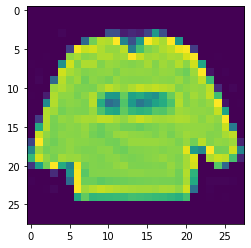

In [40]:
#checking the image type of first row
plt.imshow(np.array(train_x.iloc[0]).reshape((28,28)))#cmap='gray')

In [41]:
## Create a dictionary of labels
label_dic={0:'T-shirt/Top',1:'Trouser',2:'Pullover',3:'Dress',4:'Coat',5:'Sandal',6:'Shirt',
           7:'Sneaker',8:'Bag',9:'Ankle Boot'}

In [42]:
import keras.utils.np_utils
#from tensorflow.keras.np_utils import to_categorical

In [43]:
# for keras to work, we need to create predictor matrix (train_x) and a y matrix 
#difference of Y in scikit learn and keras
## Create numpy arrays for predictor matrix and labels
x=np.array(train_x)
y=keras.utils.np_utils.to_categorical(np.array(train_y),10)

In [45]:
#view of Y (lables matrix) in keras
pd.DataFrame(y).head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
#import seq, dense and activation
#sequnetial is for creating instance of a model
#Dense and Activation are for network architecture
from keras.models import Sequential
from keras.layers import Dense, Activation

In [47]:
#instantiates a model object
model=Sequential() 

In [48]:
## Create network architecture
#first layer 24 perceptron and 784 parameters
model.add(Dense(units=24,input_dim=784))
#activation is sigmoid 
model.add(Activation('sigmoid'))
#since this is output layer so no of classes is no of output neuron
model.add(Dense(units=10))
#by rule, output layer of a classification exercise of ANN has activation function as softmax
model.add(Activation('softmax'))

In [49]:
#loss function defined , stochastic gradient descent (sgd) for optimization and 
#I will tracking the metric of classification accuracy over each epoch
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [50]:
#fit method to fit the model for predictor matrix and target matrix
history=model.fit(x,y,epochs=12,batch_size=1000,validation_split=0.20)

Epoch 1/12
48/48 [==============================] - 2s 27ms/step - loss: 2.0186 - accuracy: 0.2320 - val_loss: 1.7772 - val_accuracy: 0.3723
Epoch 2/12
48/48 [==============================] - 1s 14ms/step - loss: 1.6619 - accuracy: 0.4935 - val_loss: 1.5713 - val_accuracy: 0.5829
Epoch 3/12
48/48 [==============================] - 1s 13ms/step - loss: 1.5187 - accuracy: 0.6209 - val_loss: 1.4698 - val_accuracy: 0.6477
Epoch 4/12
48/48 [==============================] - 1s 12ms/step - loss: 1.4396 - accuracy: 0.6610 - val_loss: 1.4061 - val_accuracy: 0.6708
Epoch 5/12
48/48 [==============================] - 1s 12ms/step - loss: 1.3794 - accuracy: 0.6825 - val_loss: 1.3494 - val_accuracy: 0.6933
Epoch 6/12
48/48 [==============================] - 1s 13ms/step - loss: 1.3277 - accuracy: 0.6952 - val_loss: 1.3085 - val_accuracy: 0.7016
Epoch 7/12
48/48 [==============================] - 1s 13ms/step - loss: 1.2833 - accuracy: 0.7059 - val_loss: 1.2651 - val_accuracy: 0.7087
Epoch 8/12
48

In [51]:
#prediction probability of row one
p=model.predict(np.array(test_x.loc[0]).reshape(1,784))

1/1 [==============================] - 0s 60ms/step


In [52]:
p

array([[0.4039703 , 0.04449482, 0.06568424, 0.11310366, 0.0994757 ,
        0.01033679, 0.17097959, 0.01040698, 0.06260979, 0.01893814]],
      dtype=float32)

In [53]:
#max value of probability
np.argmax(p)

0

In [54]:
label_dic[0]

'T-shirt/Top'

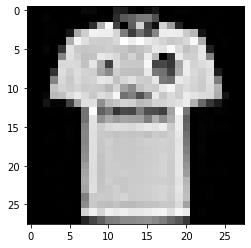

In [55]:
plt.imshow(np.array(test_x.loc[0]).reshape((28,28)),cmap='gray')

In [56]:
print(test_y.head())

   label
0      0
1      1
2      2
3      2
4      3


In [57]:
#prediction probability of row sixteen
p=model.predict(np.array(test_x.loc[15]).reshape(1,784))

1/1 [==============================] - 0s 39ms/step


In [58]:
p


array([[0.01008198, 0.00784274, 0.01182335, 0.00108774, 0.0385212 ,
        0.51536745, 0.02246756, 0.11955406, 0.1557119 , 0.11754197]],
      dtype=float32)

In [59]:
#max value of probability
np.argmax(p)

5

In [60]:
label_dic[5]

'Sandal'

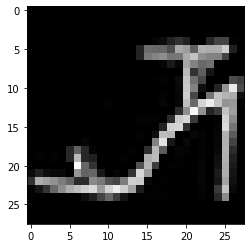

In [61]:
plt.imshow(np.array(test_x.loc[15]).reshape((28,28)),cmap='gray')

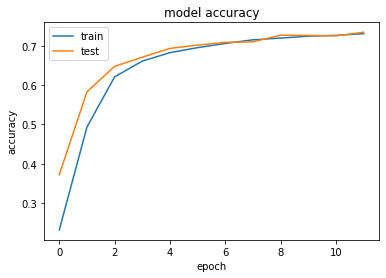

In [62]:
## Check for overfit
# Plot training and validation accuracy across different eppochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

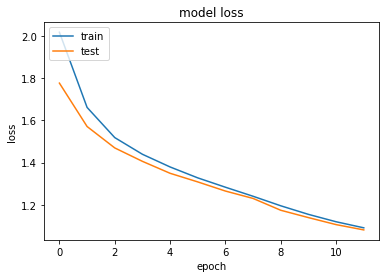

In [63]:
# summarize history for loss across different eppochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()